In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/test-file/tested.csv


In [15]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('/kaggle/input/test-file/tested.csv', usecols =['Age', 'Fare','Survived'])

In [17]:
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [18]:
df.isnull().mean()*100

Survived     0.000000
Age         20.574163
Fare         0.239234
dtype: float64

In [19]:
X = df.drop(columns =['Survived'])
y = df['Survived']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=42)

In [21]:
# adding new col to the dataset, so that we can make changes in the new column

X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [22]:
X_train.head()

,Age,Fare,Age_imputed
336,32.0,13.0000,32.0
31,24.0,31.5000,24.0
84,NaN,10.7083,NaN
287,24.0,82.2667,24.0
317,19.0,10.5000,19.0


In [23]:
# using the below code, we will replace the null values in age_imputed by the random values generated

# getting the null values using the code:  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] 
# fetching the random values using the code: X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
# X_train['Age'].isnull().sum()  --  this piece of code gives us the number of null values, i.e. the number of sample values that we need to fetch

X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

In [24]:
X_train

,Age,Fare,Age_imputed
336,32.0,13.0000,32.0
31,24.0,31.5000,24.0
84,NaN,10.7083,8.0
287,24.0,82.2667,24.0
317,19.0,10.5000,19.0
...,...,...,...
71,21.0,7.8958,21.0
106,21.0,7.8208,21.0
270,46.0,75.2417,46.0
348,24.0,13.5000,24.0


**As we can see in the above dataset, there are NaN values in Age column but no NaN value in Age_imputed column**

/tmp/ipykernel_32/129028444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label = 'Original', hist = False)
/tmp/ipykernel_32/129028444.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist = False)


<Axes: xlabel='Age_imputed', ylabel='Density'>

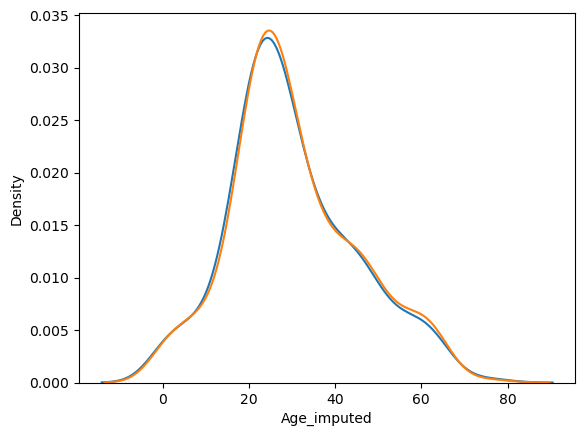

In [25]:
sns.distplot(X_train['Age'], label = 'Original', hist = False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist = False)

**As we can see the distribution remains same!**

In [27]:
print('Original values variance', X_train['Age'].var())
print('Imputed value variance' , X_train['Age_imputed'].var())

Original values variance 214.79174558363312
Imputed value variance 216.3158963954973


In [28]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,3370.347022,324.009543,246.026900
Age,324.009543,214.791746,214.791746
Age_imputed,246.026900,214.791746,216.315896


<Axes: >

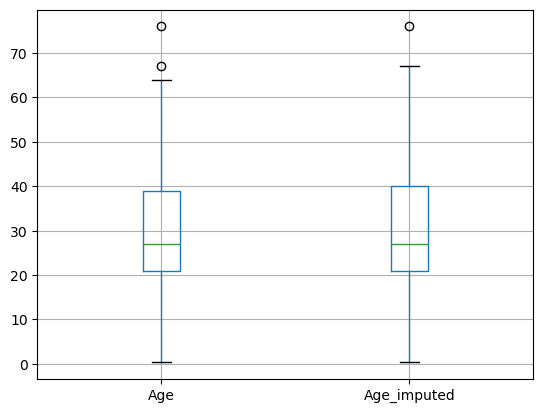

In [29]:
X_train[['Age', 'Age_imputed']].boxplot()

**not much effect on ourliers**

In [31]:
# since we age generating the missing values randomly, so each time user will give all the other values same but since random number is diff
# it will give different results every time, which is not fare. therefore, for the same other value, the same random value should get used. for that we use
# the below code:

sampled_value= X_train['Age'].dropna().sample(1, random_state= int(observation['Fare']))

NameError: name 'observation' is not defined